Wavefunction Practice Questions
Here are some plots and equtions related to the Bonus Wavefunction Questions.



In [43]:
#These are just the initial imports to get the plots later
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense
import math 

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=150 # dots per inch

# Question 1

The question gives us this piecewise wavefunction
$$\psi(x)=\begin{cases}
A \cos( \frac{2}{\pi x L}) & \text{if } \frac{-L}{4} \leq x \leq \frac{L}{4} \\
0 & \text{otherwise}
\end{cases}$$

We will use the python numpy library to code up this function using the piecewise method. Note that the $x$ below will refer to an array of numbers rather than just a single number, which means we have to be careful how we define the conditions and the function.

In [2]:
#Define a function which will operate on an array of x values all at once
def cos2pixoverL(A,x,L):
    conds = [x < -L/4, (x >= -L/4) & (x <= L/4), x > L/4]   #The three regions of x
    funcs = [lambda x: 0, lambda x: A*np.cos(2*math.pi*x/L),  # sin(pi x) in the middle and 0 outsides
            lambda x: 0]  #the lambda keyword is allowing us to define a quick function
    return np.piecewise(x, conds, funcs)  #Now do the piecewise calculation and return it

In [3]:
#Now we will use the linspace function to get 100 numbers
# linearly spaced between -L and L and lets set L=1
x = np.linspace(-0.5, 0.5, 100)
#print("x=",x)  #Just print the numbers, since -2 and 4 are in the 100 numbers the step size is not 0.06
#print("cos2pixoveL(x)=",cos2pixoverL(1,x,1)) #Print the wavefunction numbers

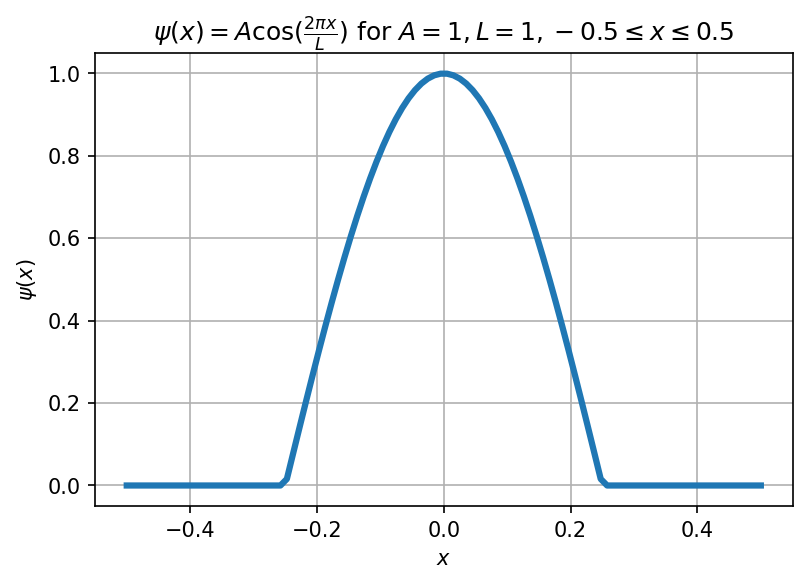

In [4]:
#Now let's create out first plot
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
ax.plot(x,cos2pixoverL(1,x,1),linewidth=3) #Plot x vs \psi(x)
ax.set_title(r"$\psi(x)=A\cos(\frac{2\pi x}{L})$ for $A=1, L=1, -0.5\leq x \leq 0.5$")  #Set the title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid

## Probability density
We saw in the lectures that the probability density associated with the waveform is:
$$ \rho(x) = \left| \psi(x) \right|^2$$
so in our case we have
$$\rho(x)=\left| \psi(x) \right|^2 =\begin{cases}
A^2 \cos^2(\frac{2 \pi x}{L}) & \text{if } -L/4 \leq x \leq L/4 \\
0 & \text{otherwise}
\end{cases}$$

So now we can plot this function

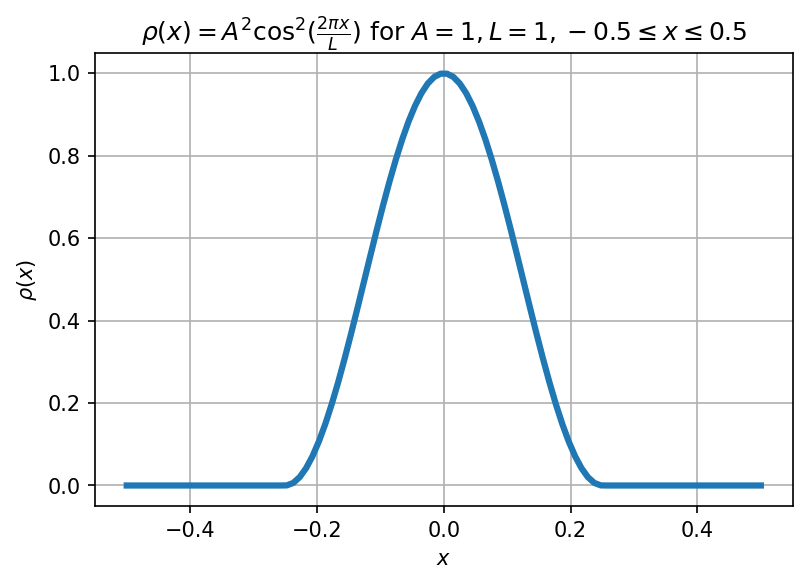

In [5]:
#Now let's create our next plot, and zoom in to the non-zero region
x = np.linspace(-0.5, 0.5, 100)  # Return an array of 100 numbers linearly spaced between -0.5 and 0.5
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
ax.plot(x,cos2pixoverL(1,x,1)**2,linewidth=3)  # Plot x vs psi^2 
ax.set_title(r"$\rho(x)=A^2 \cos^2(\frac{2\pi x}{L})$ for $A=1, L=1, -0.5\leq x \leq 0.5$")  # Set the title
ax.set_xlabel("$x$")  # Set the x-axis label
ax.set_ylabel(r"$\rho(x)$")  # Set the y-axis label
ax.grid() # Draw a grid

## Question 1a) Normalisation

We can integrate the probability density in order to determine what the normalisation constant $A$ should be.
$$\int_{-\infty}^{\infty} A^2 \cos^2 \left(\frac{2 \pi x}{L}\right) dx = \int_{-\frac{L}{4}}^{\frac{L}{4}} A^2 \cos^2 \left(\frac{2 \pi x}{L}\right) dx = 1 $$
we can use the double angle formula $cos^2 \theta = \frac{1}{2}\left(1 + \cos \left(2 \theta \right) \right) $ to get
$$ 1 = \int_{-\frac{L}{4}}^{\frac{L}{4}} \frac{A^2}{2} dx + \int_{-\frac{L}{4}}^{\frac{L}{4}} \frac{A^2}{2} \cos \left(\frac{4 \pi x}{L}\right) dx $$
$$ 1 = \left[ \frac{xA^2}{2}\right]_{-\frac{L}{4}}^{\frac{L}{4}} + \left[ \frac{A^2}{2} \frac{\sin \left(\frac{4 \pi x}{L}\right)}{4\pi/L}\right]_{-\frac{L}{4}}^{\frac{L}{4}} $$
The second term is zero since $\sin \pi =0$, giving
$$ 1 = \left( \frac{LA^2}{8} + \frac{LA^2}{8} \right) =\frac{LA^2}{4} $$
and therefore
$$ A = \frac{2}{\sqrt{L}}$$

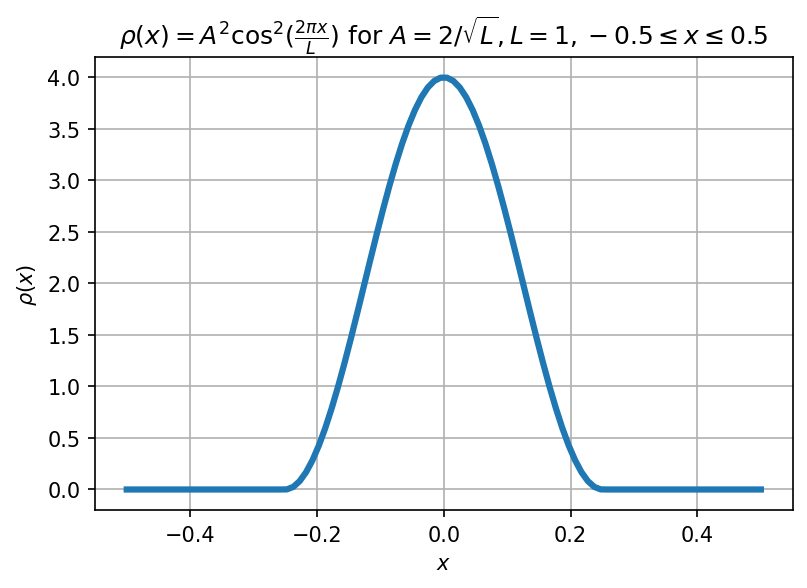

In [6]:
#Now let's create our next plot, and zoom in to the non-zero region
L=1
A=2/np.sqrt(L)
x = np.linspace(-0.5, 0.5, 100)  # Return an array of 100 numbers linearly spaced between -0.5 and 2.5
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
ax.plot(x,cos2pixoverL(A,x,L)**2,linewidth=3)  # Plot x vs psi^2 
ax.set_title(r"$\rho(x)=A^2 \cos^2(\frac{2\pi x}{L})$ for $A=2/\sqrt{L}, L=1, -0.5\leq x \leq 0.5$")  # Set the title
ax.set_xlabel("$x$")  # Set the x-axis label
ax.set_ylabel(r"$\rho(x)$")  # Set the y-axis label
ax.grid() # Draw a grid

### Is this normalised?
We can also use the computer to check if we got the normalistion correct.

In [7]:
# The integral is just the area under the curve.
# numpy.trapz uses the trapezium rule to calculate the area under the curve
norm=np.trapz(cos2pixoverL(A,x,L)**2,dx=x[1]-x[0])
print("Did we normalise the wavefunction?\nN=",norm)

Did we normalise the wavefunction?
N= 0.9999949120079397


## Question 1b) Probability

We can integrate the probability density in order to determine what the normalisation constant $A$ should be.
$$P(0 \leq x \leq \frac{L}{8}) = \int_{0}^{\frac{L}{8}} \frac{2}{L} \cos^2 \left(\frac{2 \pi x}{L}\right) dx $$
we can use the double angle formula $cos^2 \theta = \frac{1}{2}\left(1 + \cos \left(2 \theta \right) \right) $ to get
$$ P(0 \leq x \leq \frac{L}{8}) = \int_{0}^{\frac{L}{8}} \frac{2}{L} dx + \int_{0}^{\frac{L}{8}} \frac{2}{L} \cos \left(\frac{4 \pi x}{L}\right) dx $$
$$ P(0 \leq x \leq \frac{L}{8}) = \left[ \frac{x2}{L}\right]_{0}^{\frac{L}{8}} + \left[ \frac{2}{L} \frac{\sin \left(\frac{4 \pi x}{L}\right)}{4\pi/L}\right]_{0}^{\frac{L}{8}} $$
which gives
$$ P(0 \leq x \leq \frac{L}{8}) =  \frac{1}{4}+ \frac{1}{2 \pi }\left(  \sin \left(\frac{\pi }{2}\right) - \sin 0 \right) $$
$$ P(0 \leq x \leq \frac{L}{8}) =  \frac{1}{4}+ \frac{1}{2 \pi }$$


In [8]:
#Which again we can check
x = np.linspace(0, 1./8., 100) # 0 to 1/8 in 100 steps
prob=np.trapz(cos2pixoverL(A,x,L)**2,dx=x[1]-x[0])
print("What is the probability of finding the system in 0<x<L/8?\nP=",prob)
print("1/4 + 1/(2pi)=",0.25 + 1./(2*math.pi))

What is the probability of finding the system in 0<x<L/8?
P= 0.4091516041406879
1/4 + 1/(2pi)= 0.4091549430918954


# Question 2
Now we have another wavefunction question. This time our wavefunction is
$$ \psi(x) = A \exp^{-\frac{(x-\mu)^2}{4 \sigma^2}} $$

Once again first we will plot the wavefunction

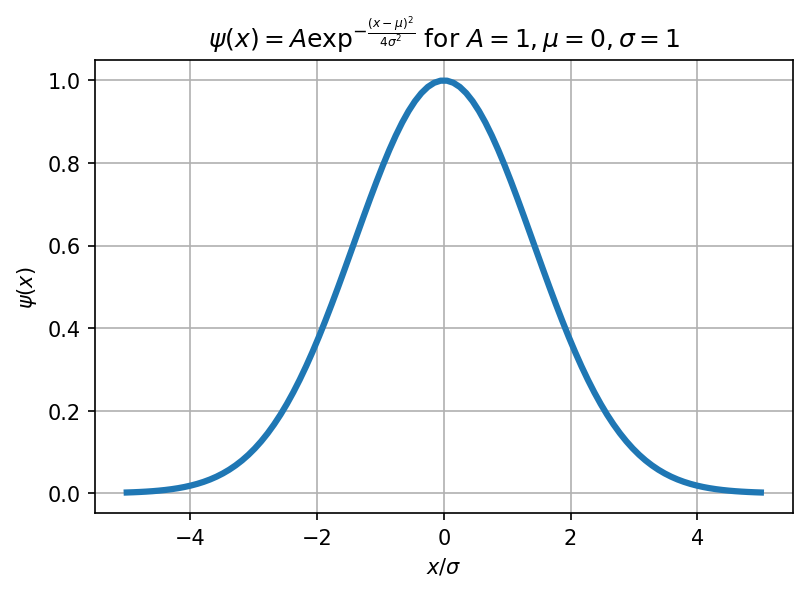

In [9]:
#Define a function which will operate on an array of x values all at once
def psiq2(A,x,mu,sig):
    return A *np.exp(-((x-mu)**2)/(4 *sig**2))

#Set our initial mu, sigma and A for plotting
mu=0
sig=1
A=1

#Now let's create plot psiq2
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-5*sig,5*sig,100)
ax.plot(x,psiq2(A,x,mu,sig),linewidth=3) #Plot x vs \psi(x)
ax.set_title(r"$\psi(x)=A \exp^{-\frac{(x-\mu)^2}{4 \sigma^2}}$ for $A="+str(A)+", \mu="+str(mu)+", \sigma="+str(sig)+"$")  #Set the title
ax.set_xlabel("$x/\sigma$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid

## Now do the normalisation
The wavefunction is $$ \psi(x) = A \exp^{-\frac{(x-\mu)^2}{4 \sigma^2}}. $$

The normalisation condition is 
$$ 1= \int_{-\infty}^{\infty} \left| \psi(x) \right|^2 dx = \int_{-\infty}^{\infty} A^2 \exp^{-\frac{(x-\mu)^2}{2 \sigma^2}} dx. $$

Let $$y=\frac{x-\mu}{\sqrt{2}\sigma}$$
so $$dy = \frac{dx}{\sqrt{2}\sigma} $$

The normalisation condition is now
$$ 1= \int_{-\infty}^{\infty} A^2 \exp^{-y^2} \sqrt{2}\sigma dy $$
using 
$$ \int_{-\infty}^{\infty} e^{-y^2} dy = \sqrt{\pi} $$
we get
$$ 1=A^2 \sqrt{\pi} \sqrt{2}\sigma $$
so
$$ A = \frac{1}{\sqrt{\sqrt{2\pi} \sigma}} $$

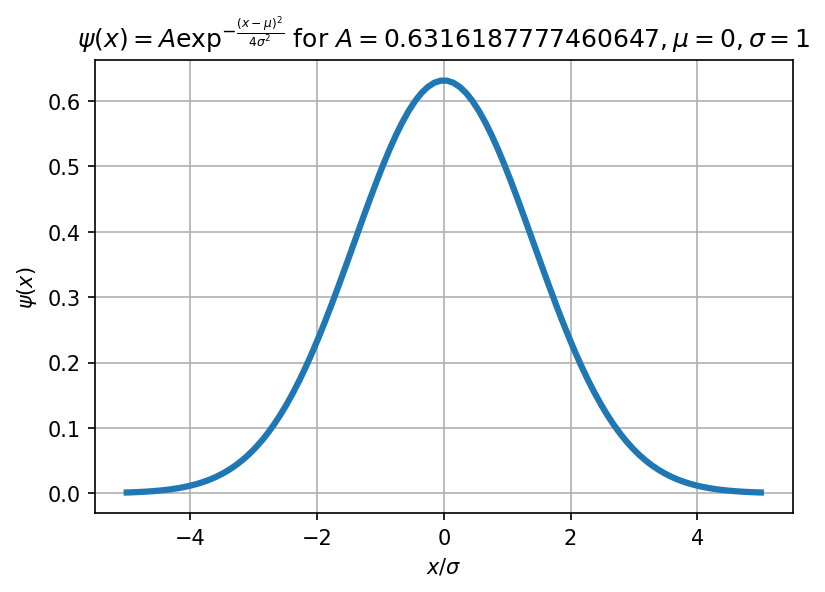

In [10]:
#Set our initial mu, sigma and A for plotting
mu=0
sig=1
A=1/np.sqrt(sig*np.sqrt(2*math.pi))

#Now let's create plot psiq2
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-5*sig,5*sig,100)
ax.plot(x,psiq2(A,x,mu,sig),linewidth=3) #Plot x vs \psi(x)
ax.set_title(r"$\psi(x)=A \exp^{-\frac{(x-\mu)^2}{4 \sigma^2}}$ for $A="+str(A)+", \mu="+str(mu)+", \sigma="+str(sig)+"$")  #Set the title
ax.set_xlabel("$x/\sigma$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid

In [11]:
#Once more we can check by numerical integration using numpy.trapz
norm=np.trapz(psiq2(A,x,mu,sig)**2,dx=x[1]-x[0])
print("Did we normalise the wavefunction?\nN=",norm)

Did we normalise the wavefunction?
N= 0.9999994141030634


# Question 3
Now we have a string of wavefunctions to test.

a) $ \psi(x) = N e^{a x^2}$

b) $ \psi(x) = N e^{-a x^2}$

c) $ \psi(x) = N \frac{e^{-a x^2}}{\left(3-x\right)}$

d) $ \psi(x) = N e^{a x}$

e) $ \psi(x) = N e^{-a x}$

In [12]:
#Define a function which will operate on an array of x values all at once
def psiq3a(N,x,a):
    return N *np.exp(a*x**2)

def psiq3b(N,x,a):
    return N *np.exp(-a*x**2)

def psiq3c(N,x,a):
    return N *np.exp(-a*x**2)/(3-x)

def psiq3d(N,x,a):
    return N *np.exp(a*x)

def psiq3e(N,x,a):
    return N *np.exp(-a*x)

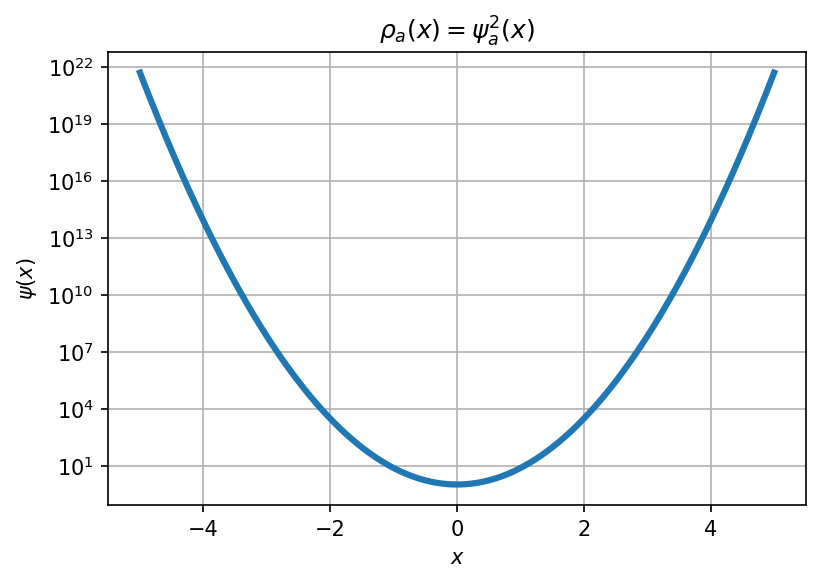

In [13]:
#Now let's plot probabilty density
N=1
a=1
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-5*sig,5*sig,1000)
ax.plot(x,psiq3a(N,x,a)**2,linewidth=3,label="a") #Plot x vs \psi(x)
ax.set_title(r"$\rho_a(x)=\psi^2_a(x)$")  #Set the title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid
ax.set_yscale("log")

## a) 
Clearly $ \psi(x) = N e^{a x^2}$ is smooth an continuous, but also this is not normalisable as the above graph diverges for both positive and negative $x$

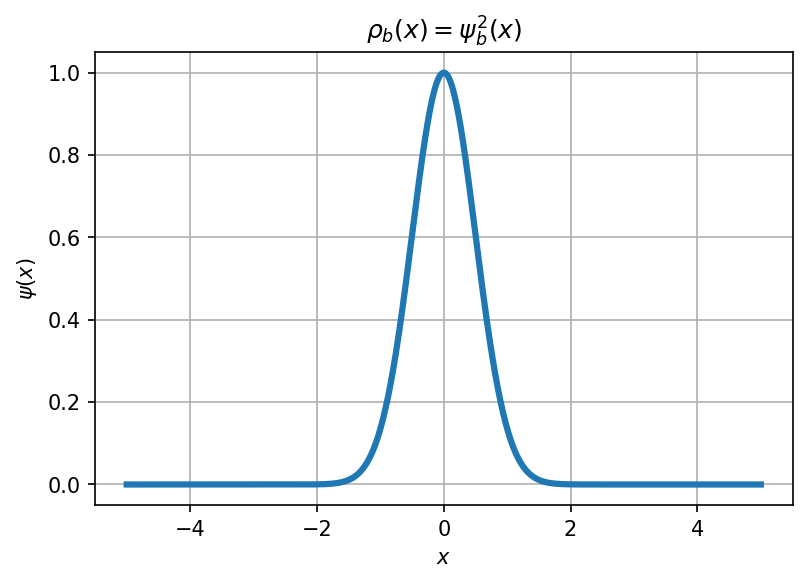

In [14]:
#Now let's  plot probability density
N=1
a=1
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-5*sig,5*sig,1000)
ax.plot(x,psiq3b(N,x,a)**2,linewidth=3,label="a") #Plot x vs \psi(x)
ax.set_title(r"$\rho_b(x)=\psi^2_b(x)$")  #Set the title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid


## b)
Clearly $ \psi(x) = N e^{-a x^2}$ is smooth and continuous, and since the area under the above curve is finite it will be normalisable


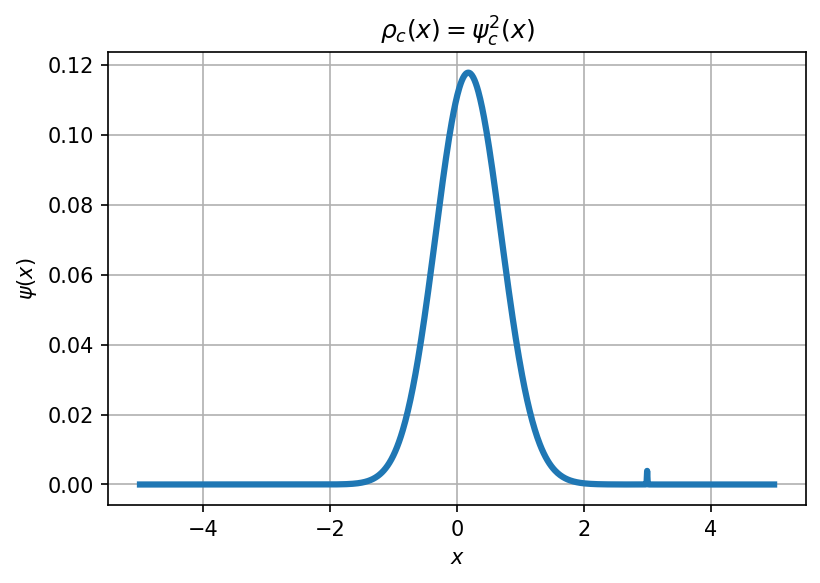

In [15]:
#Now let's plot probability density
N=1
a=1
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-5*sig,5*sig,1000)
ax.plot(x,psiq3c(N,x,a)**2,linewidth=3,label="a") #Plot x vs \psi(x)
ax.set_title(r"$\rho_c(x)=\psi^2_c(x)$")  #Set the title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid

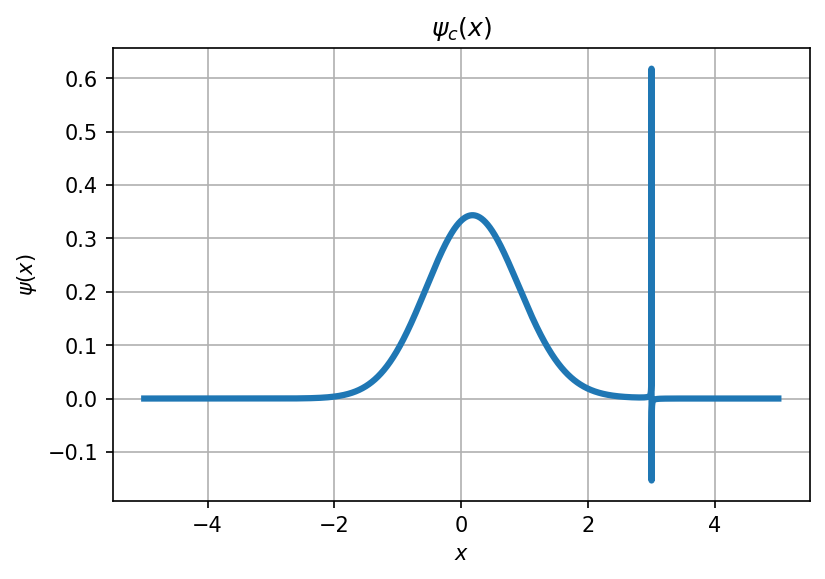

In [16]:
#Now let's plot the wavefunction
N=1
a=1
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-5*sig,5*sig,10000)
ax.plot(x,psiq3c(N,x,a),linewidth=3,label="a") #Plot x vs \psi(x)
ax.set_title(r"$\psi_c(x)$")  #Set the title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid

## c) 
$$ \psi(x) = N \frac{e^{-a x^2}}{\left(3-x\right)}$$
Whilst the area under the probability density is finite this function is not smooth and continuous (flipping from +ve to -ve infinity at 3.



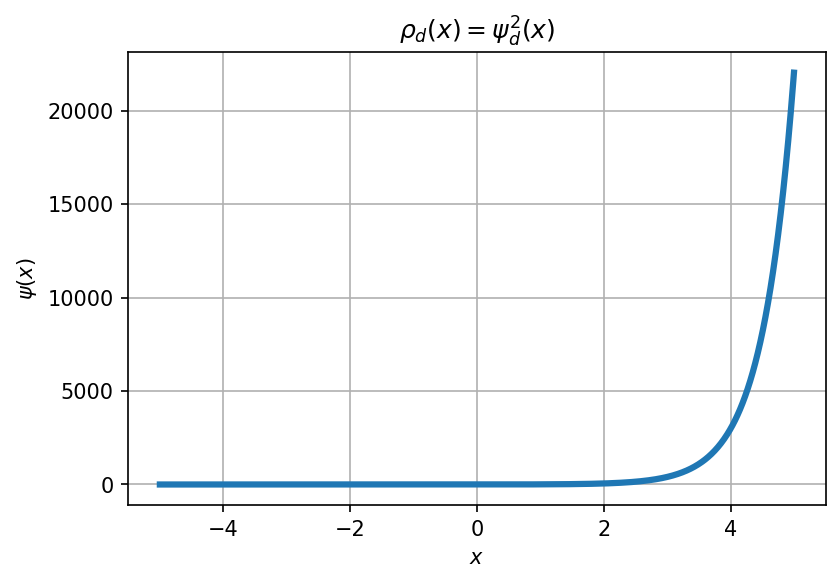

In [17]:
#Now let's plot probability density
N=1
a=1
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-5*sig,5*sig,1000)
ax.plot(x,psiq3d(N,x,a)**2,linewidth=3,label="a") #Plot x vs \psi(x)
ax.set_title(r"$\rho_d(x)=\psi^2_d(x)$")  #Set the title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid

## d) 
Clearly  $ \psi(x) = N e^{a x}$ is smooth an continuous, but also this is not normalisable as the above graph diverges for positive $x$

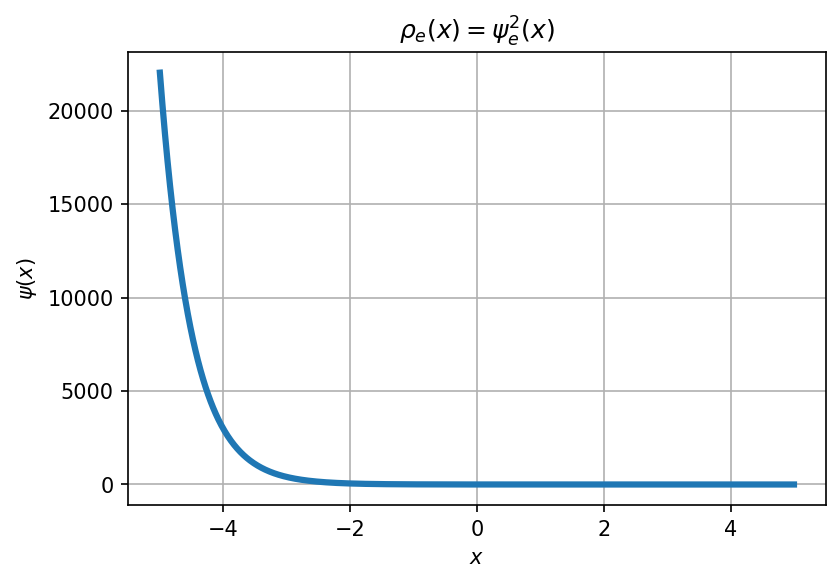

In [18]:
#Now let's plot probability density
N=1
a=1
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-5*sig,5*sig,1000)
ax.plot(x,psiq3e(N,x,a)**2,linewidth=3,label="a") #Plot x vs \psi(x)
ax.set_title(r"$\rho_e(x)=\psi^2_e(x)$")  #Set the title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid

## e) 
Clearly  $ \psi(x) = N e^{-a x}$ is smooth an continuous, but also this is not normalisable as the above graph diverges for negative $x$

# Question 4


The question gives us this piecewise wavefunction
$$\psi(x)=\begin{cases}
\frac{Ax}{a} & \text{if } 0 \leq x \lt a \\
\frac{A(b-x)}{(b-a)} & \text{if } a \leq x \lt b \\ 
0 & \text{otherwise}
\end{cases}$$

In [19]:
#Define a function which will operate on an array of x values all at once
def psiq4(A,x,a,b):
    conds = [x < 0, (x>= 0) & (x<a), (x >= a) & (x <= b), x > b]   #The four regions of x
    funcs = [lambda x:0, lambda x: A*x/a, lambda x: A*(b-x)/(b-a), 
            lambda x: 0]  #the lambda keyword is allowing us to define a quick function
    return np.piecewise(x, conds, funcs)  #Now do the piecewise calculation and return it

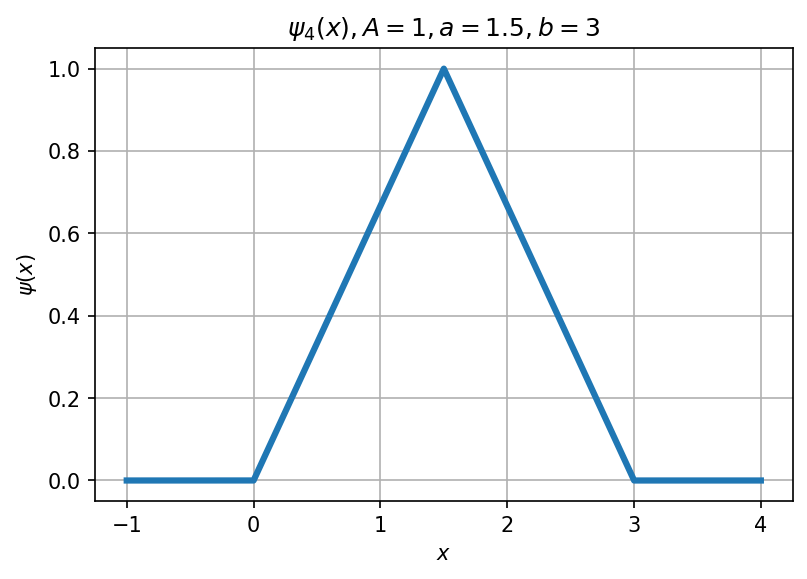

In [25]:
#Now let's plot the wavefunction
A=1
a=1.5
b=3
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-1,4,10000)
ax.plot(x,psiq4(A,x,a,b),linewidth=3,label="a") #Plot x vs \psi(x)
ax.set_title(r"$\psi_4(x), A="+str(A)+", a="+str(a)+", b="+str(b)+"$")  #Set the title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid

## a) Normalisation

We can integrate the probability density in order to determine what the normalisation constant $A$ should be.
$$\int_{-\infty}^{\infty} | \psi(x) |^2 dx = \int_{0}^{a} \frac{A^2 x^2}{a^2} dx + \int_{a}^{b} \frac{A^2 (b-x)^2}{(b-a)^2} dx = 1 $$
Taking the first term first
$$ \int_{0}^{a} \frac{A^2 x^2}{a^2} dx = \left[ \frac{A^2 x^3}{3a^2} \right]_{0}^{a} = \frac{A^2 a}{3} $$
Now the second term
$$ \int_{a}^{b} \frac{A^2 (b-x)^2}{(b-a)^2} dx= \left[ -\frac{A^2 (b-x)^3}{3(b-a)^2}  \right]_a^b = \frac{A^2 (b-a)}{3} $$
Adding them together we get
$$ 1 = \frac{A^2 b}{3} $$
so
$$ A=\sqrt{\frac{3}{b}}$$
Interestingly the normalisation turns out to be independent of $a$, which makes since the length from 0 to $b$ always defines the bottom of the triangle.

## b) Plot wavefunction and probability density

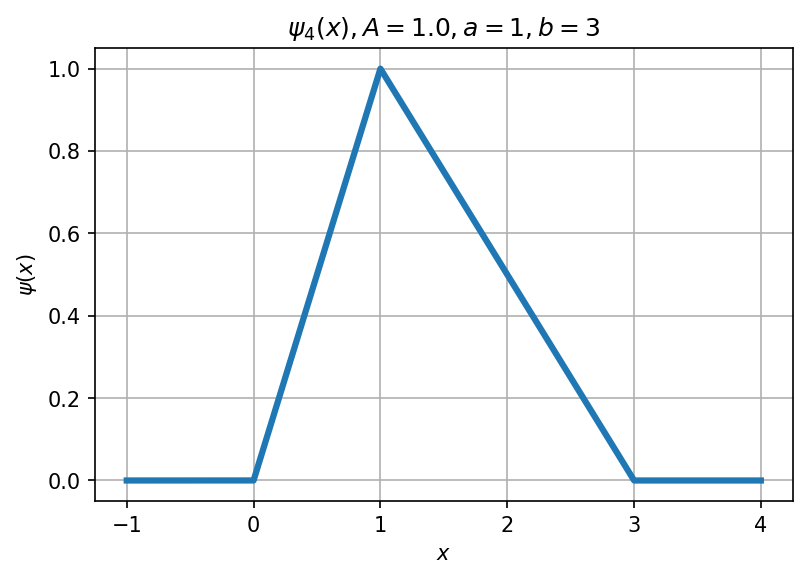

In [30]:
#Now let's plot the wavefunction
a=1
b=3
A=np.sqrt(3/b)
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-1,4,10000)
ax.plot(x,psiq4(A,x,a,b),linewidth=3,label="a") #Plot x vs \psi(x)
ax.set_title(r"$\psi_4(x), A="+str(A)+", a="+str(a)+", b="+str(b)+"$")  #Set the title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid

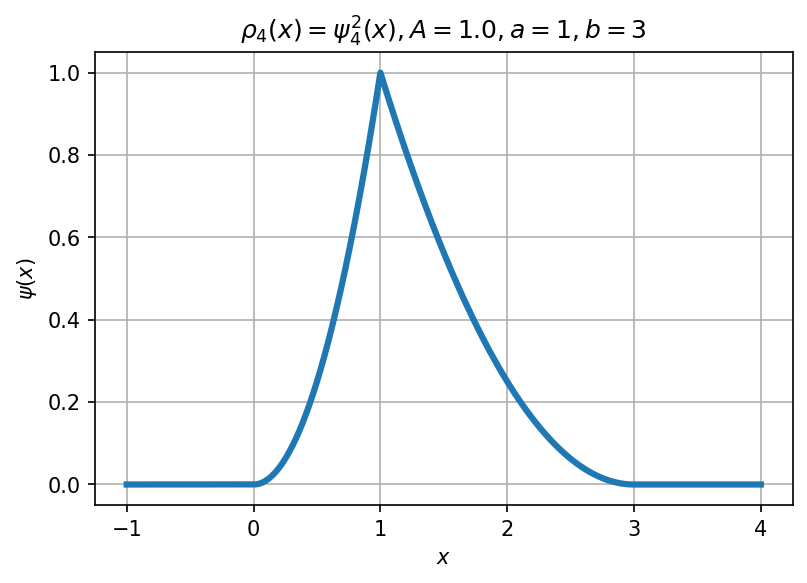

In [35]:
#Now let's plot the probability density
a=1
b=3
A=np.sqrt(3/b)
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-1,4,10000)
ax.plot(x,psiq4(A,x,a,b)**2,linewidth=3,label="a") #Plot x vs \psi(x)
ax.set_title(r"$\rho_4(x)=\psi^2_4(x), A="+str(A)+", a="+str(a)+", b="+str(b)+"$")  #Set the title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid

## c) Probability

We can integrate the probability density in order to determine what the normalisation constant $A$ should be.
$$P(0 \leq x \leq a) = \int_{0}^{a} \frac{3 x^2}{b a^2} dx $$
Doing the integral (again)
$$ \int_{0}^{a} \frac{3 x^2}{b a^2} dx = \left[ \frac{x^3}{ b a^2} \right]_{0}^{a} = \frac{a}{b} $$


## d) Expectation Value

Now we get to do a (slightly) different integral
$$<x>=\int_{-\infty}^{\infty} x | \psi(x) |^2 dx = \int_{0}^{a} \frac{3 x^3}{b a^2} dx + \int_{a}^{b} \frac{3 x (b-x)^2}{b (b-a)^2} dx = 1 $$
Again doing the easy one first
$$ \int_{0}^{a} \frac{3 x^3}{b a^2} dx = \left[ \frac{3 x^4}{4b a^2} \right]_{0}^{a} = \frac{3 a^2}{4b}$$
Now doing the second term 
$$ \int_{a}^{b} \frac{3 x (b-x)^2}{b (b-a)^2} dx = \int_{a}^{b} \frac{3(x b^2 -2bx^2 +x^3)}{b (b-a)^2} dx = \frac{3}{b (b-a)^2} \left[ \frac{x^2 b^2}{2} - \frac{2 b x^3}{3} + \frac{x^4}{4} \right]_{a}^{b} $$
$$ \frac{3}{b (b-a)^2} \left[ (\frac{b^2 b^2}{2} - \frac{2 b b^3}{3} + \frac{b^4}{4}) - (\frac{a^2 b^2}{2} - \frac{2 b a^3}{3} + \frac{a^4}{4}) \right] $$
Therefore
$$ <x>= \frac{3a^2}{4b} + \frac{3}{b (b-a)^2} \left[ \frac{b^4}{12}  - (\frac{a^2 b^2}{2} - \frac{2 b a^3}{3} + \frac{a^4}{4}) \right] $$
Which is a nasty mess but if we plug in $a=1$ and $b=3$ we get
$$<x>=\frac{5}{4}$$

In [42]:
#Sadly this doesn't simplify any more but it is calcuable
def nastymess(a,b):
    return (3*a**2/(4*b)) + ((b**4)/12 - ( (a**2 * b**2) /2 - 2 * b * a**3/3 + a**4/4))*3/(b*(b-a)**2)


# We can also evaulate this numerically
#Once more we can check by numerical integration using numpy.trapz
mu=np.trapz(x*psiq4(A,x,a,b)**2,dx=x[1]-x[0])
print("What is the numerically integrated expectation value:\n<x>=",mu)
print("What is the nasty mess value:\n<x>=",nastymess(a,b))

What is the numerically integrated expectation value:
<x>= 1.2499999724968243
What is the nasty mess value:
<x>= 1.25
